In [ ]:
# can't use all data for memory reason, only use half
test_mode = True

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# define root directory for the script
root_dir = 'D:/OpenClassrooms/projet_5'
dataset_name = 'df_final_4'

In [ ]:
# for bigger plots
scale_factor = 2

default_size = [6.0, 4.0]
scaled_size = [scale_factor * n for n in default_size]
plt.rcParams['figure.figsize'] = scaled_size


# to see all columns when looking at a dataframe
pd.set_option('display.max_columns', None)

In [ ]:
# get data
data_path = root_dir + '/data/' + dataset_name + '.csv'
df = pd.read_csv(data_path)

test_mode_samples = 50000
if test_mode:
    df = df.sample(test_mode_samples)
    
print(df.shape)
df.head()

(50000, 25)


,customer_unique_id,M,freight_value,R,nb_days_order_approved,nb_days_delivered_carrier,nb_days_delivered_customer,nb_days_estimate_delivery,payment_sequential,payment_installments,...,review_score,review_title,review_message,nb_days_survey_respond,zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,F
56373,9bed676175d3561a1610ac36f878be37,149.88,20.29,392,0.0,4.0,12.0,23.0,1.0,2.0,...,5.0,0,1,0.0,74913.0,aparecida de goiania,GO,-16.762495,-49.261729,1
44976,7c4c172f6ad96039c75d87385d74d0b8,99.99,13.04,237,0.0,0.0,5.0,15.0,1.0,3.0,...,5.0,0,1,1.0,14500.0,ituverava,SP,-20.331453,-47.789020,1
38670,6acbd95f502950f253a1d4d8c6b0f486,45.80,32.88,232,0.0,4.0,11.0,36.0,1.0,2.0,...,5.0,0,0,6.0,2955.0,sao paulo,SP,-23.468188,-46.720337,1
9264,19759427b9c94d4f7e25373d0410107c,44.90,15.23,549,0.0,0.0,18.0,23.0,1.0,4.0,...,5.0,0,0,2.0,24901.0,marica,RJ,-22.923867,-42.819631,1
68651,bdd710c465e9827aff166974ed49f6a9,19.00,12.79,676,0.0,1.0,6.0,14.0,1.0,1.0,...,5.0,0,0,0.0,17250.0,bariri,SP,-22.074149,-48.740361,1


In [ ]:
# make subset of the final dataframe for clustering with a model

to_keep = ['R', 
           'F', 
           'M', 
           'review_title', 
           'review_message', 
           'payment_installments', 
           'payment_sequential', 
           'nb_days_survey_respond', 
           'pay_boleto', 
           'pay_credit_card', 
           'pay_debit_card', 
           'pay_voucher', 
           'freight_value', 
           'payment_value'
          ]

data = df[to_keep]
#data = df.drop(to_drop, axis=1)

print(data.shape)
data.head()

(50000, 14)


,R,F,M,review_title,review_message,payment_installments,payment_sequential,nb_days_survey_respond,pay_boleto,pay_credit_card,pay_debit_card,pay_voucher,freight_value,payment_value
56373,392,1,149.88,0,1,2.0,1.0,0.0,0,1,0,0,20.29,170.17
44976,237,1,99.99,0,1,3.0,1.0,1.0,0,1,0,0,13.04,113.03
38670,232,1,45.80,0,0,2.0,1.0,6.0,0,1,0,0,32.88,67.72
9264,549,1,44.90,0,0,4.0,1.0,2.0,0,1,0,0,15.23,60.13
68651,676,1,19.00,0,0,1.0,1.0,0.0,0,1,0,0,12.79,31.79


In [ ]:
# data to numpy & normalize

X = data.to_numpy()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# DBSCAN
from sklearn.cluster import DBSCAN
model = DBSCAN(min_samples=100, eps=4)
model.fit(X)
pred = model.labels_

from sklearn import metrics
silhouette = metrics.silhouette_score(X, pred)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(pred)) - (1 if -1 in pred else 0)
n_noise_ = list(pred).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette Coefficient: %0.3f" % silhouette)

Estimated number of clusters: 3
Estimated number of noise points: 477
Silhouette Coefficient: 0.476


In [ ]:
# select columns to graph
types = ['int64', 'float64']

to_graph = []
for column in df:
    if df[column].dtypes in types:
        to_graph.append(column)

df_graph = df[to_graph]
df_graph = df_graph.drop('zip_code_prefix', axis=1)
df_graph['pred'] = pred
print(df_graph.shape)

(50000, 22)


In [ ]:
# population of each cluster
print(df_graph['pred'].value_counts())

 0    47492
 2     1299
 1      732
-1      477
Name: pred, dtype: int64


M :


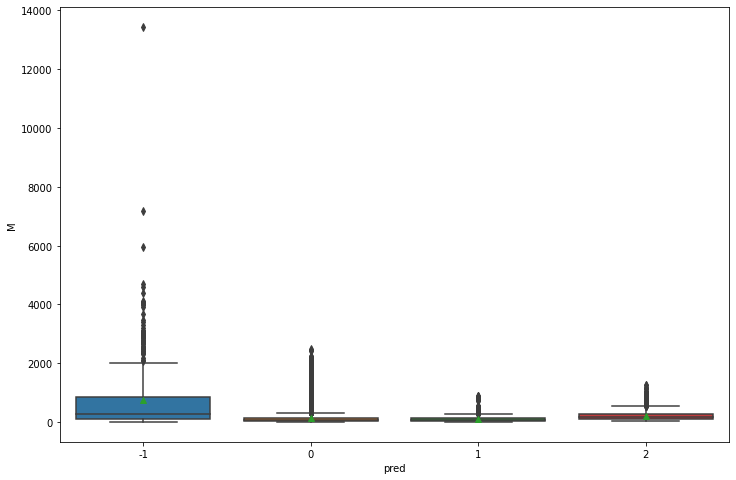





freight_value :


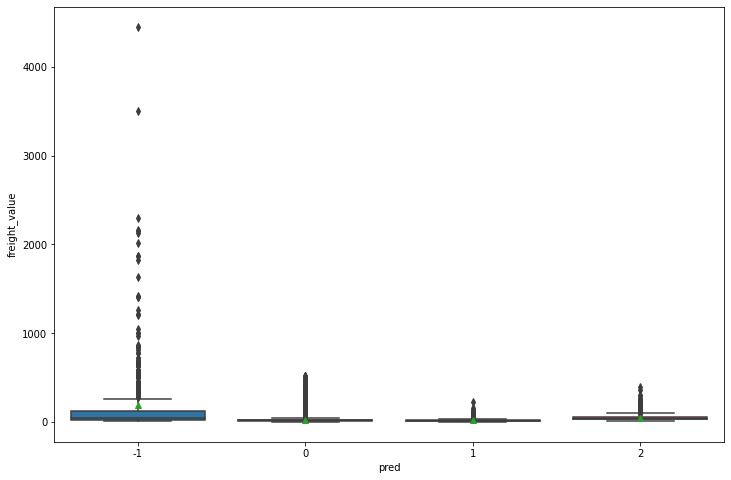





R :


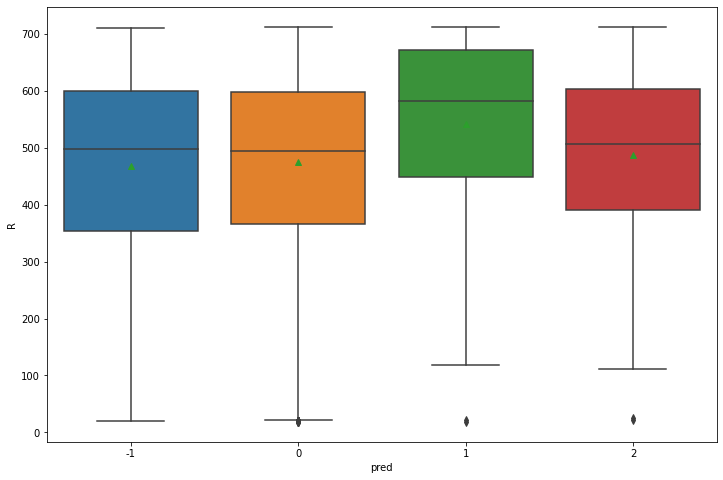





nb_days_order_approved :


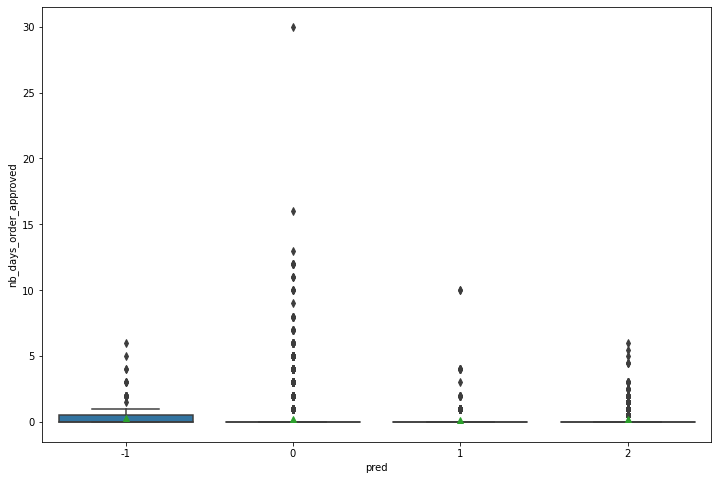





nb_days_delivered_carrier :


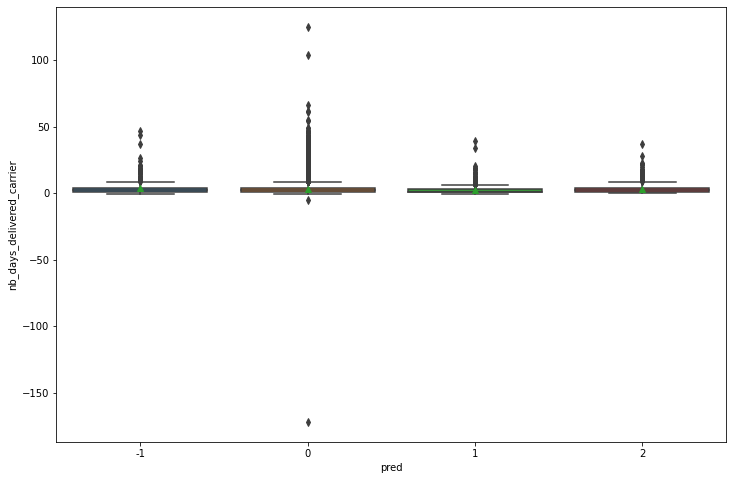





nb_days_delivered_customer :


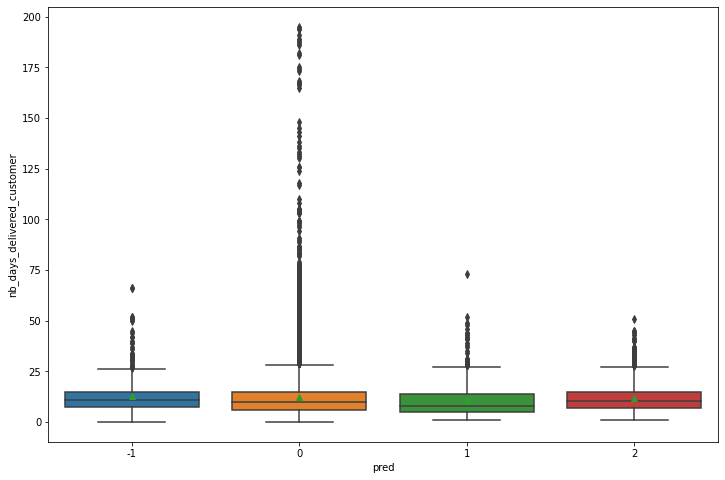





nb_days_estimate_delivery :


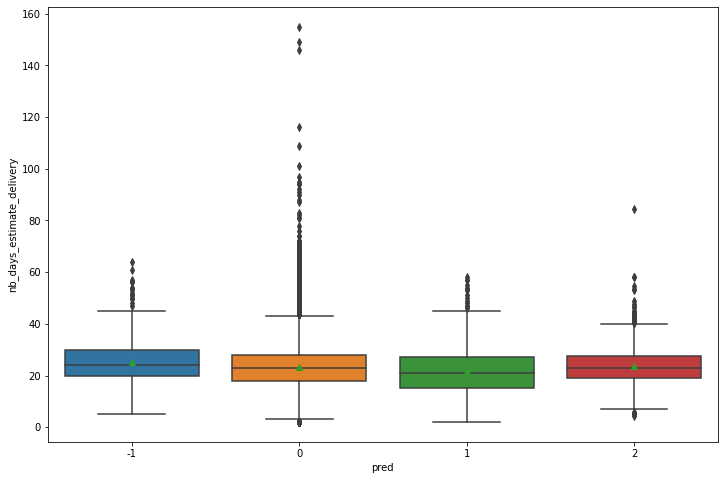





payment_sequential :


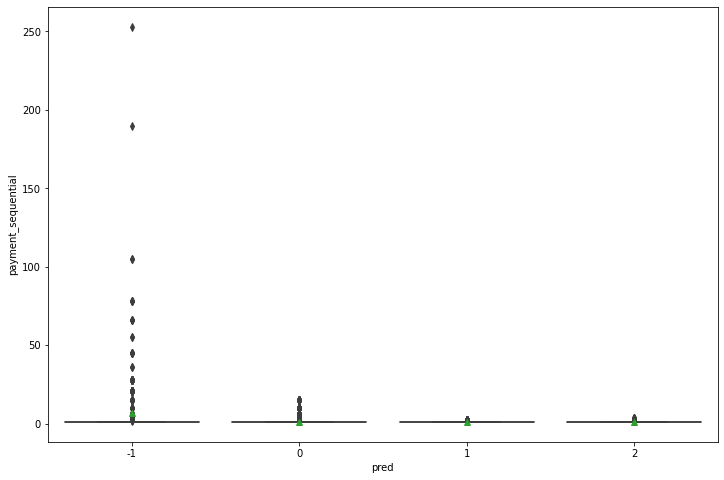





payment_installments :


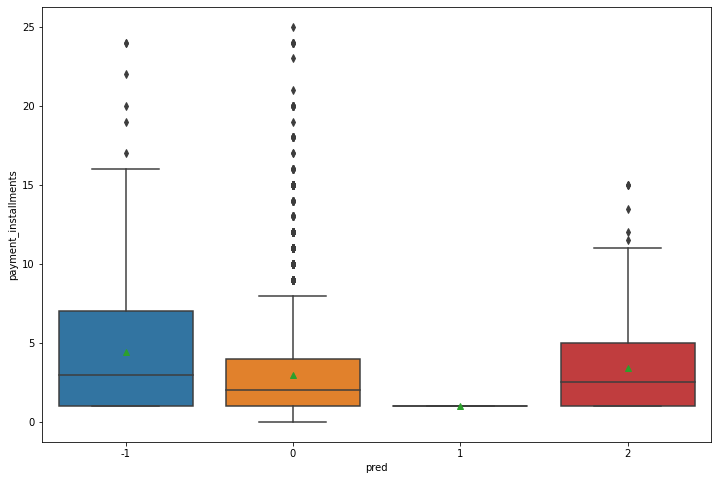





pay_boleto :


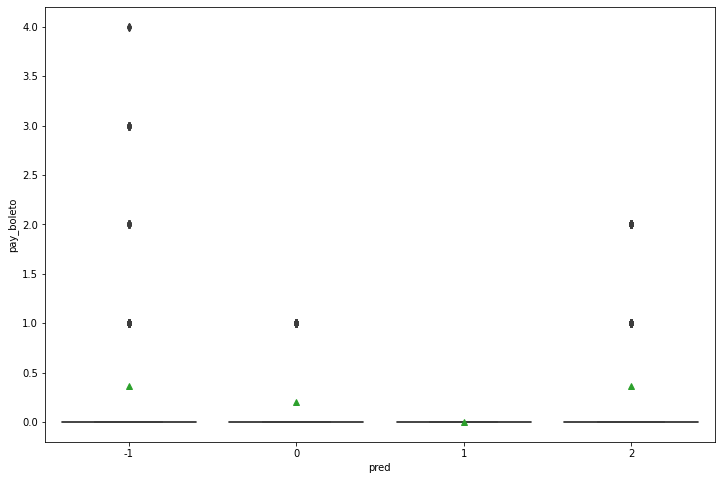





pay_credit_card :


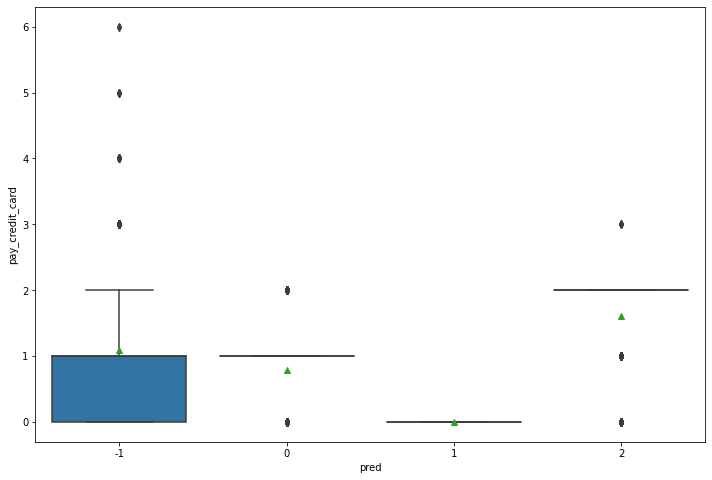





pay_debit_card :


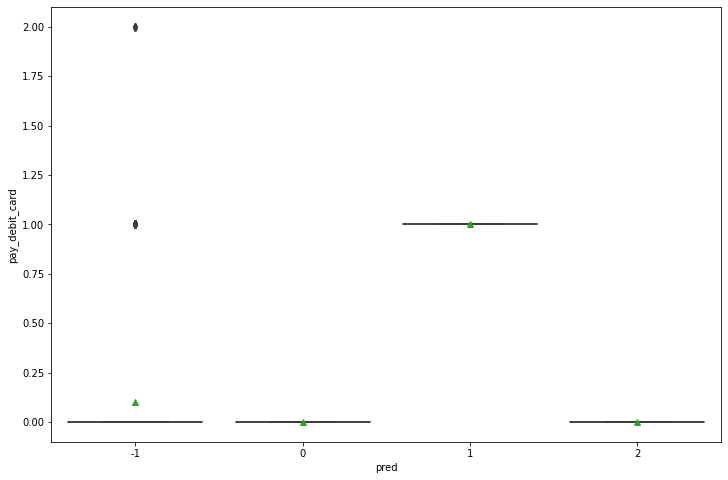





pay_voucher :


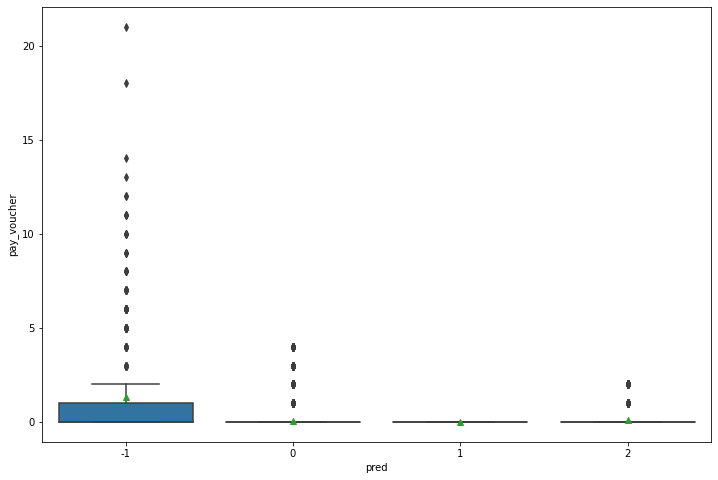





payment_value :


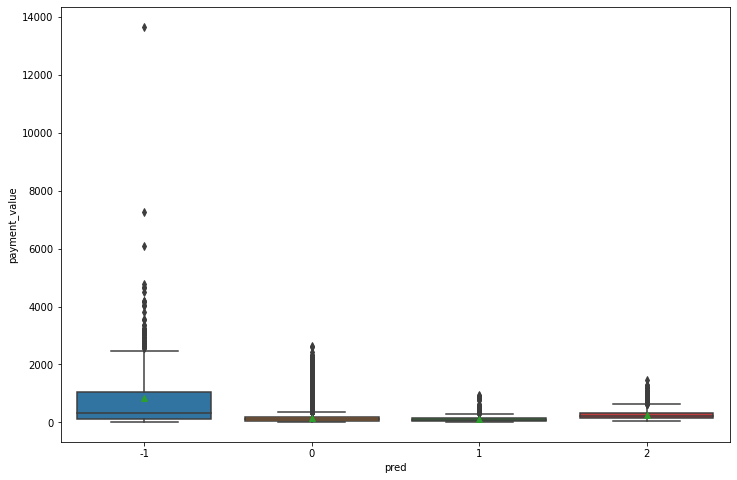





review_score :


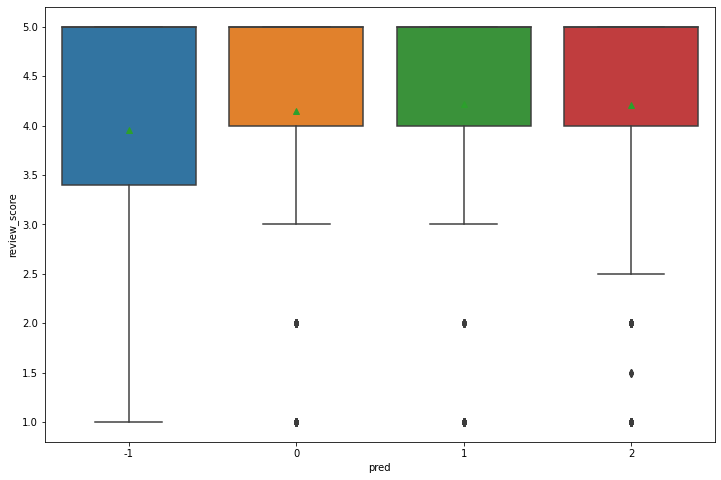





review_title :


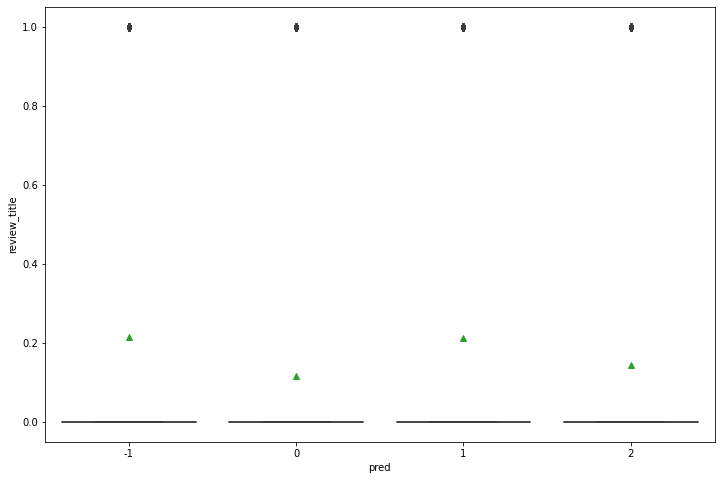





review_message :


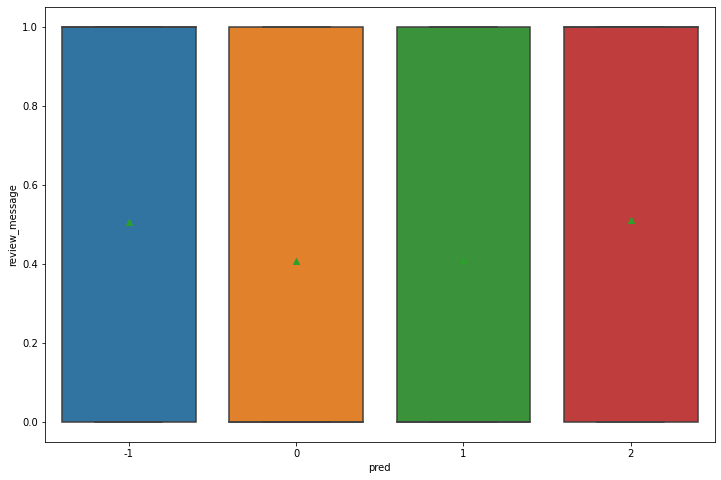





nb_days_survey_respond :


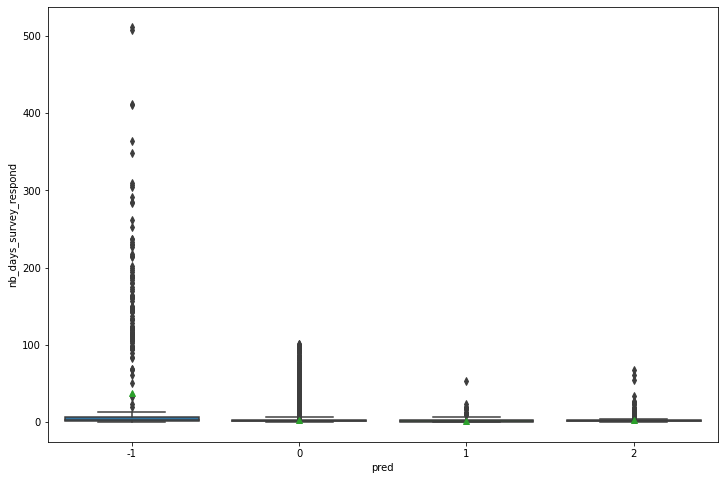





geolocation_lat :


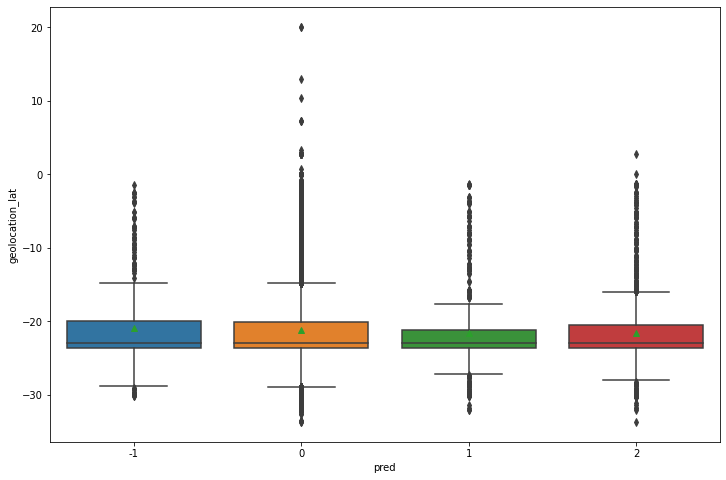





geolocation_lng :


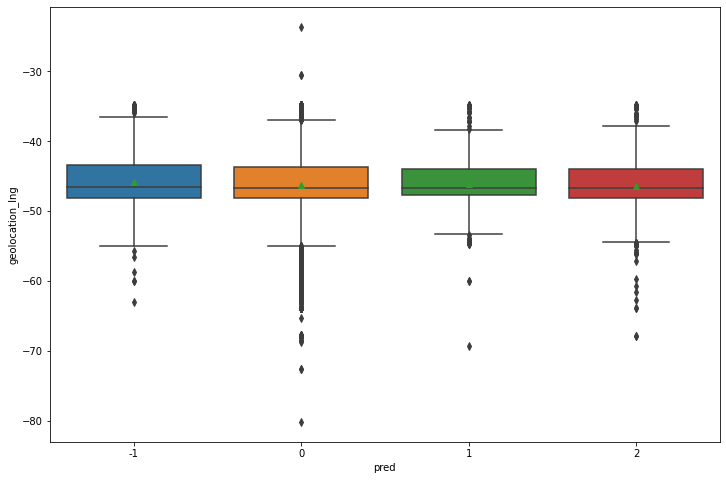





F :


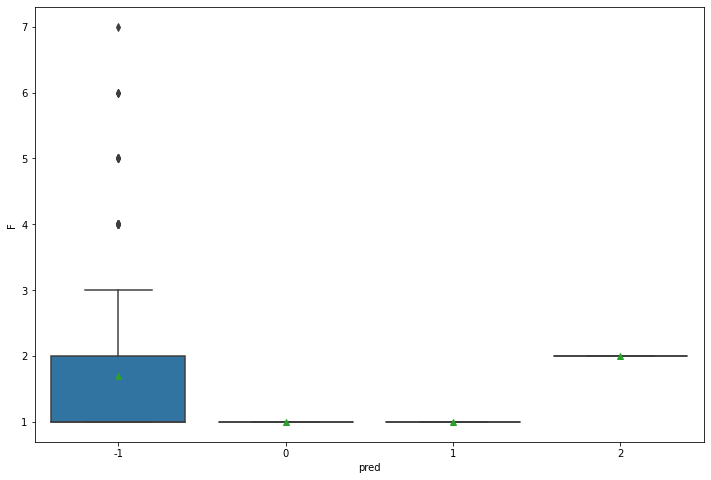





pred :


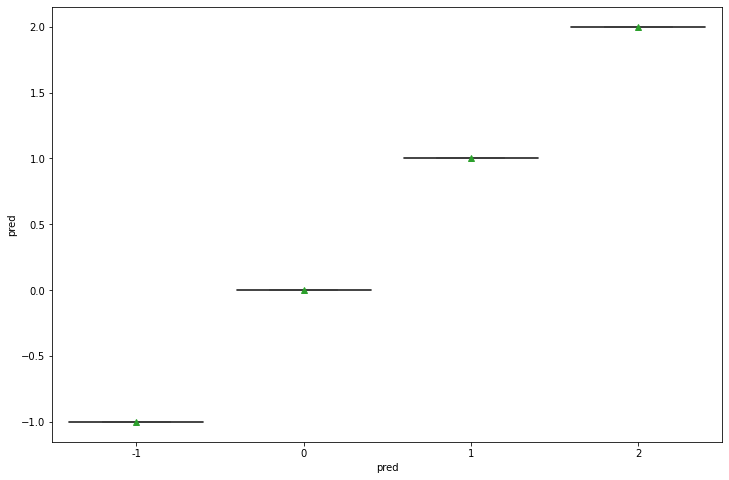

In [ ]:
for column in df_graph:
    print(column, ':')
    plt.figure()
    sns.boxplot(x='pred', y=column, data=df_graph, showmeans=True)
    plt.show()
    print('\n'*3)

In [ ]:
# clusters means
df_graph_agg = df_graph.groupby('pred', as_index=False).agg(np.mean)
df_graph_agg.head()

,pred,M,freight_value,R,nb_days_order_approved,nb_days_delivered_carrier,nb_days_delivered_customer,nb_days_estimate_delivery,payment_sequential,payment_installments,...,pay_debit_card,pay_voucher,payment_value,review_score,review_title,review_message,nb_days_survey_respond,geolocation_lat,geolocation_lng,F
0,-1,742.741509,194.291530,468.878407,0.325996,3.590147,12.884696,25.308176,6.937107,4.406709,...,0.100629,1.352201,827.777296,3.955660,0.213836,0.505241,38.238994,-20.885129,-45.851256,1.698113
1,0,133.034263,25.652105,474.586478,0.261791,2.715278,12.110187,23.343426,1.074939,2.966879,...,0.000000,0.044260,155.525116,4.149373,0.115746,0.407563,2.279816,-21.168856,-46.200575,1.000000
2,1,104.723579,21.411967,542.177596,0.168033,2.545082,10.650273,21.801913,1.034153,1.000000,...,1.000000,0.000000,124.431011,4.217213,0.213115,0.409836,1.894809,-21.514490,-46.120761,1.000000
3,2,221.804219,50.559376,487.601232,0.266359,2.931486,11.788684,23.633564,1.058122,3.394149,...,0.000000,0.084681,264.798845,4.210547,0.145497,0.510393,2.208237,-21.645512,-46.457234,2.000000
